In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [3]:
u_inf = 1.0  # freestream speed

# calculate freestream velocity components
u_freestream = u_inf * numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros((N,N), dtype=float)

In [4]:
class Source:
    """
    Contains information related to a source/sink.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            strength of the source/sink
        X: 2D numpy array of floats
            x-coordinate of the mesh points
        Y: 2D numpy array of floats
            y-coordinate of the mesh points
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the source/sink.
        
        Parameters
        ----------
        X: 2D numpy array of floats
            x-coordinate of the mesh points
        Y: 2D numpy array of floats
            y-coordinate of the mesh points
        """
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by the source/sink.
        
        Parameters
        ----------
        X: 2D numpy array of floats
            x-coordinate of the mesh points
        Y: 2D numpy array of floats
            y-coordinate of the mesh points
        """
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [5]:
N_sources = 11                                    # number of sources
strength = 5.0                                    # sum of source strengths
strength_source = strength/N_sources              # strength of one source
x_source = numpy.zeros(N_sources, dtype=float)           # horizontal position of sources (all 0), 1D array
y_source = numpy.linspace(-1.0, 1.0, N_sources)          # vertical position of sources (evenly spaced 11 times from -1 to 1), 1D array

# create a source line by calling Source class multiple times (Numpy array of Source objects)
# use for loop - first make empty array and then fill it:
sources = numpy.empty(N_sources,dtype=object)        # dtype object because it's a class
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)
    
# superposition of all sources on freestream flow
u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    u += source.u
    v += source.v

stagnation point indices 39 49


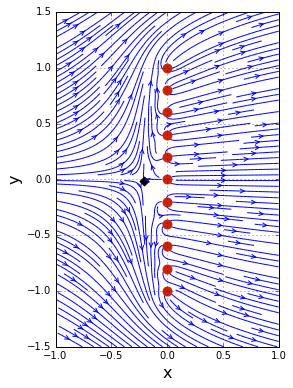

In [6]:
# plot the streamlines
size = 4
pyplot.figure(figsize = (size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the sources
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# compute the velocity magnitude and indices of the stagnation point
# note: stagnation point approximated as the point with the smallest magnitude
magnitude = numpy.sqrt(u**2+v**2)
j_stag, i_stag = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
print ('stagnation point indices', i_stag, j_stag)

# plot the stagnation point
pyplot.scatter(x[i_stag], y[j_stag], color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);

## Minimum total source strength to enclose all sources in dividing streamline is about 22

# Infinite Line of Sources

In [7]:
from scipy import integrate

In [8]:
print(integrate.quad(lambda x: x**2, 0, 1))

(0.33333333333333337, 3.700743415417189e-15)


In [9]:
a = 3.0
print(integrate.quad(lambda x, a: a*x**2, 0, 1, args=a))
b = 2.0
print(integrate.quad(lambda x, a, b: a*b*x**2, 0, 1, args=(a, b)))

(1.0, 1.1102230246251565e-14)
(2.0, 2.220446049250313e-14)


In [10]:
sigma = 2.5                     # strength of the source sheet

# boundaries of the source sheet
y_min, y_max = -1.0, 1.0

# create the anonymous functions
integrand_u = lambda s, x, y: x / (x**2 + (y-s)**2)
integrand_v = lambda s, x, y: (y-s) / (x**2 + (y-s)**2)

# create a dummy function to vectorize
def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

# compute the velocity field generated by the source-sheet
u_sheet = sigma / (2*numpy.pi)*vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2*numpy.pi)*vec_integration(X, Y, integrand_v)

# superposition of source sheet on uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

stagnation point indices = 33 49


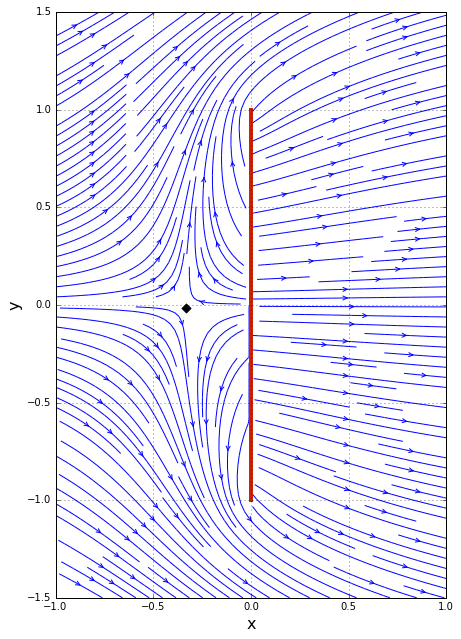

In [11]:
# plot the streamlines
size = 7
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.grid()
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the source sheet
pyplot.axvline(0.0, (y_min-y_start)/(y_end-y_start),(y_max-y_start)/(y_end-y_start), color='#CD2305', linewidth=4)

# compute velocity magnitude and indices of stagnation point
magnitude = numpy.sqrt(u**2+v**2)
j_stag, i_stag = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
print('stagnation point indices =', i_stag, j_stag)

# plot the stagnation point
pyplot.scatter(x[i_stag], y[j_stag], color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);

In [12]:
# use new source sheet strength
sigma = 2.0

# compute the velocity field generated by the source-sheet
u_sheet = sigma / (2*numpy.pi)*vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2*numpy.pi)*vec_integration(X, Y, integrand_v)

# superposition of source sheet on uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

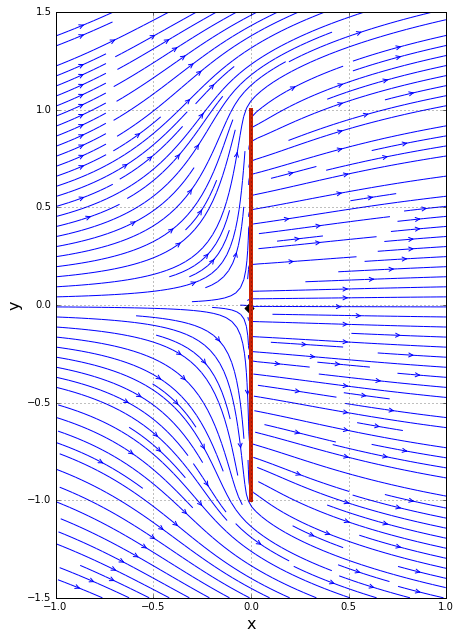

In [13]:
# plot the streamlines
size = 7
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.grid()
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the source sheet
pyplot.axvline(0.0, (y_min-y_start)/(y_end-y_start),(y_max-y_start)/(y_end-y_start), color='#CD2305', linewidth=4)

# compute velocity magnitude and indices of stagnation point
magnitude = numpy.sqrt(u**2+v**2)
j_stag, i_stag = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

# plot the stagnation point
pyplot.scatter(x[i_stag], y[j_stag], color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);

## Stagnation point is now right at the wall and the dividing streamline is the source sheet